In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('face.csv')
df

,direction,accident
0,30,1
1,45,2
2,60,3
3,90,4
4,100,4
5,120,5
6,180,6
7,80,4


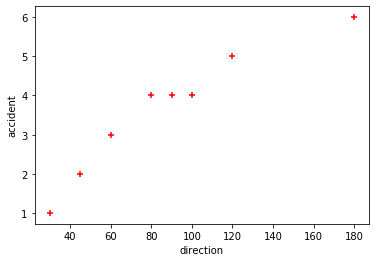

In [3]:
%matplotlib inline
plt.xlabel('direction')
plt.ylabel('accident')
plt.scatter(df.direction,df.accident,color='red',marker='+')

In [4]:
new_df = df.drop('accident',axis='columns')
new_df

,direction
0,30
1,45
2,60
3,90
4,100
5,120
6,180
7,80


In [5]:
accident = df.accident
accident

0    1
1    2
2    3
3    4
4    4
5    5
6    6
7    4
Name: accident, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,accident)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[100]])

array([4.00656978])

In [8]:
reg.coef_


array([0.03213219])

In [9]:
reg.intercept_

0.7933505872984279

In [10]:
100*0.03213219+0.7933505872984279

4.0065695872984275

In [11]:
reg.predict([[60]])

array([2.7212821])

In [12]:
direction_df = pd.read_csv("direction.csv")
direction_df.head(3)

,direction
0,30
1,44
2,66


In [14]:
p = reg.predict(direction_df)
p

array([1.75731634, 2.20716703, 2.91407525, 3.62098348, 6.12729445,
       3.74951224, 4.3278917 ])

In [15]:
direction_df['accident']=p
direction_df

,direction,accident
0,30,1.757316
1,44,2.207167
2,66,2.914075
3,88,3.620983
4,166,6.127294
5,92,3.749512
6,110,4.327892


In [16]:
direction_df.to_csv("faceprediction.csv")